SEATTLE WEATHER DATA PREDICTION


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving seattle_weather.csv to seattle_weather.csv


In [30]:
import pandas as pd
import io
seattle_data = pd.read_csv(io.StringIO(uploaded['seattle_weather.csv'].decode('utf-8')))

EDA and DATA PREPROCESSING

In [31]:
seattle_data.describe(include='all')

,DATE,PRCP,TMAX,TMIN,RAIN
count,25551,25548.000000,25551.000000,25551.000000,25548
unique,25551,NaN,NaN,NaN,2
top,1987-09-30,NaN,NaN,NaN,False
freq,1,NaN,NaN,NaN,14648
mean,NaN,0.106222,59.544206,44.514226,NaN
std,NaN,0.239031,12.772984,8.892836,NaN
min,NaN,0.000000,4.000000,0.000000,NaN
25%,NaN,0.000000,50.000000,38.000000,NaN
50%,NaN,0.000000,58.000000,45.000000,NaN
75%,NaN,0.100000,69.000000,52.000000,NaN


In [32]:
seattle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [33]:
seattle_data.isnull().sum() ## There are 3 missing values present in PRCP and RAIN.Lets substitute them using median and mode

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [34]:
#checking if any duplicate rows
duplicate = seattle_data.duplicated()
seattle_data[duplicate]


,DATE,PRCP,TMAX,TMIN,RAIN


In [35]:
seattle_data[seattle_data['RAIN'].isnull()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [36]:
## Imputing missing values with median and mode
median = seattle_data['PRCP'].median()
seattle_data['PRCP'].fillna(median, inplace=True)


In [37]:
seattle_data['RAIN'] = seattle_data['RAIN'].fillna(seattle_data['RAIN'].mode()[0])

In [38]:
seattle_data['RAIN']=[1 if i==True else 0 for i in seattle_data['RAIN']] ##substituting with 0 s and 1 s as it s categorical for proper learning of the model

In [39]:
import datetime  ###Year ,Month and Day are extracted from DATE and instead of training directly from Date will use extracted features for training .
seattle_data['Year'] = pd.DatetimeIndex(seattle_data['DATE']).year
seattle_data['Month'] = pd.DatetimeIndex(seattle_data['DATE']).month
seattle_data['day'] = pd.DatetimeIndex(seattle_data['DATE']).day
seattle_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25551 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25551 non-null  int64  
 5   Year    25551 non-null  int64  
 6   Month   25551 non-null  int64  
 7   day     25551 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 1.6+ MB


In [27]:
duplicate=seattle_data.duplicated(['RAIN','PRCP','TMIN','TMAX','DATE','Year','Month','day'])
duplicate.sum()

0

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


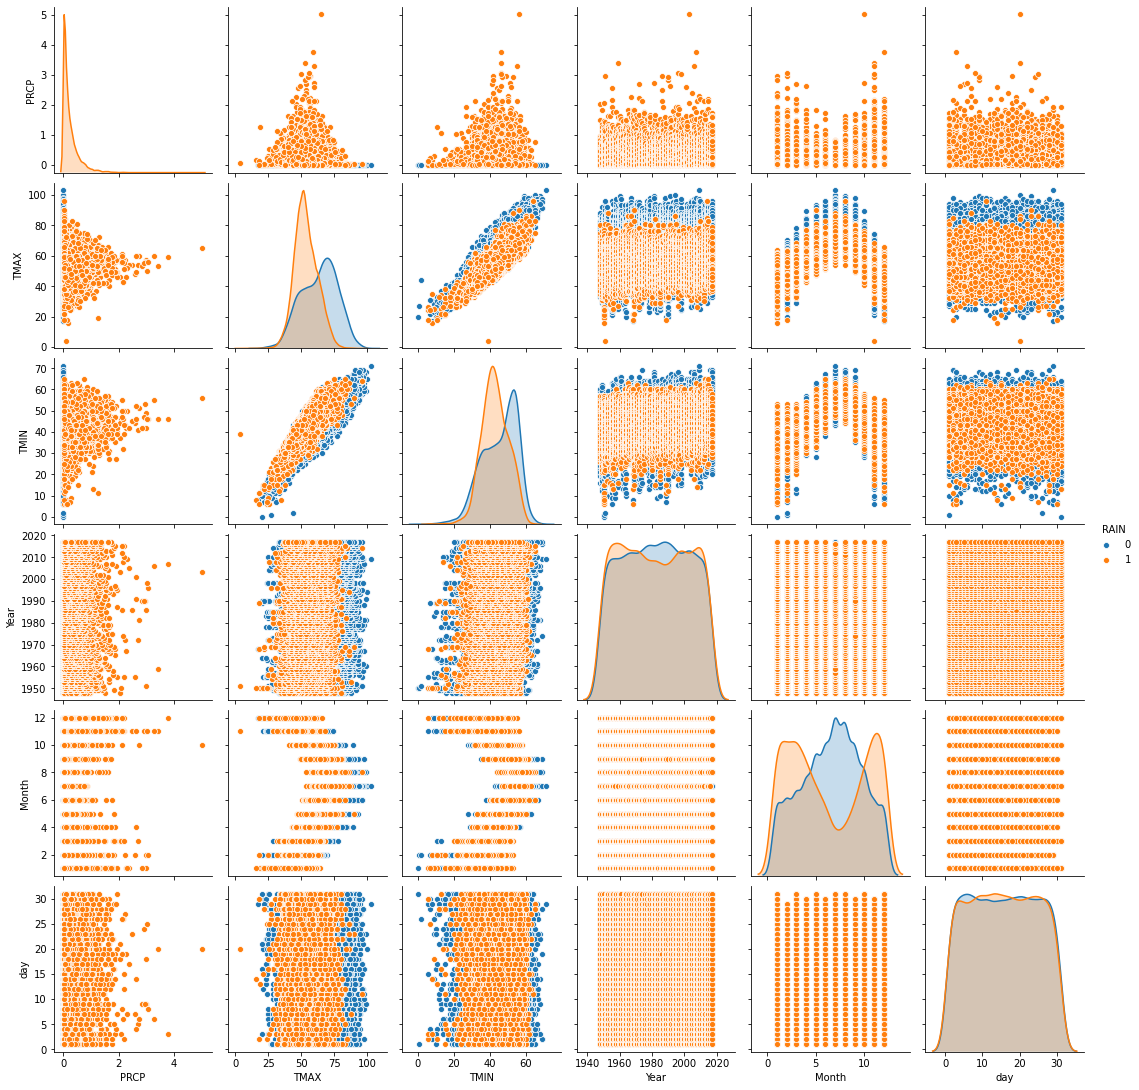

In [ ]:
sns.pairplot(seattle_data, hue='RAIN', size=2.5); ##Could see skewness for PRCP,TMAX and TMIN from the below distributions.


Text(0.5, 1.0, 'Box plot with Outliers')

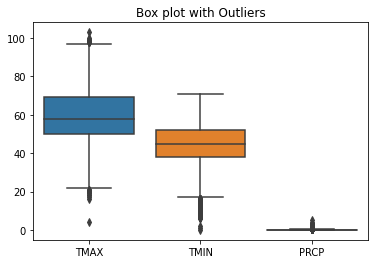

In [ ]:
import matplotlib.pyplot as plt

sns.boxplot(data=seattle_data[['TMAX','TMIN','PRCP']])
plt.title("Box plot with Outliers")

In [ ]:
Q1 = seattle_data[['TMIN','TMAX','PRCP']].quantile(0.25)
Q3 = seattle_data[['TMIN','TMAX','PRCP']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
seattle_data_o =seattle_data[['TMIN','TMAX','PRCP','RAIN','day','Month','Year']]

TMIN    14.0
TMAX    19.0
PRCP     0.1
dtype: float64


In [ ]:
(seattle_data_o < (Q1 - 1.5 * IQR)) |(seattle_data_o > (Q3 + 1.5 * IQR))

,Month,PRCP,RAIN,TMAX,TMIN,Year,day
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
25546,False,False,False,False,False,False,False
25547,False,False,False,False,False,False,False
25548,False,False,False,False,False,False,False
25549,False,False,False,False,False,False,False


In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(seattle_data_o))
print(z)


[[0.28273047 0.66894103 1.52203861 ... 1.67325991 1.60116947 1.70738404]
 [0.95744409 1.13869169 2.02409806 ... 1.55962642 1.60116947 1.70738404]
 [1.06989637 1.13869169 1.31284718 ... 1.44599293 1.60116947 1.70738404]
 ...
 [1.40725318 1.06039991 0.4443609  ... 0.42329153 1.59003107 1.70969243]
 [1.18234864 0.90381636 0.4443609  ... 0.30965804 1.59003107 1.70969243]
 [0.95744409 0.74723281 0.4443609  ... 0.19602455 1.59003107 1.70969243]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([   46,    55,    80,   147,   148,   162,   269,   271,   318,
         343,   358,   368,   374,   375,   376,   388,   389,   390,
         393,   406,   412,   417,   665,   681,   695,   718,   722,
         726,   732,   733,   734,   736,   743,   743,   743,   744,
         744,   745,   745,   746,   747,   748,   749,   750,   754,
         755,   756,   758,   759,   760,   761,   761,   762,   763,
         764,   784,   792,   793,   805,   806,   807,   957,   997,
        1007,  1013,  1054,  1057,  1064,  1094,  1097,  1116,  1123,
        1124,  1125,  1134,  1135,  1152,  1367,  1383,  1419,  1460,
        1461,  1463,  1490,  1793,  1828,  1837,  1844,  1848,  1909,
        2099,  2108,  2151,  2165,  2179,  2196,  2211,  2212,  2234,
        2258,  2372,  2512,  2513,  2520,  2537,  2594,  2619,  2620,
        2837,  2838,  2853,  2854,  2862,  2871,  2872,  2872,  2873,
        2874,  2875,  2878,  2886,  2901,  2910,  2911,  2912,  2923,
        2924,  2925

In [ ]:
seattle_data_o = seattle_data_o[(z < 3).all(axis=1)]


In [ ]:
seattle_data.shape

(25551, 8)

In [ ]:
seattle_data_o.shape ### outliers have been removed

(24870, 7)

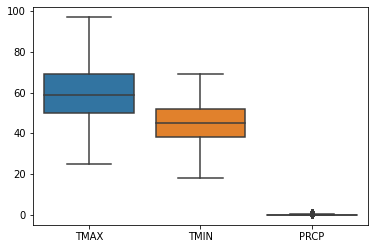

In [ ]:
sns.boxplot(data=seattle_data_o[['TMAX','TMIN','PRCP']]) ##no outliers but still see some skewness in prcp

In [ ]:
seattle_data_o.corr()

,TMIN,TMAX,PRCP,RAIN,day,Month,Year
TMIN,1.000000,0.860539,-0.098067,-0.150869,0.007262,0.227231,0.112524
TMAX,0.860539,1.000000,-0.280465,-0.394339,0.004964,0.159614,0.054376
PRCP,-0.098067,-0.280465,1.000000,0.614345,-0.000341,-0.018706,-0.007998
RAIN,-0.150869,-0.394339,0.614345,1.000000,-0.002453,-0.055267,-0.013170
day,0.007262,0.004964,-0.000341,-0.002453,1.000000,0.005912,0.001014
Month,0.227231,0.159614,-0.018706,-0.055267,0.005912,1.000000,-0.006632
Year,0.112524,0.054376,-0.007998,-0.013170,0.001014,-0.006632,1.000000


In [ ]:
duplicate = seattle_data_o.duplicated()
seattle_data_o[duplicate]
duplicate.sum()

0

MODELLING

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras import regularizers
from keras.layers import Dropout,BatchNormalization,Activation
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping,History




In [ ]:
X = seattle_data_o[['PRCP','TMIN','TMAX','Month','Year','day']]
Y = seattle_data_o['RAIN']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test.shape

(4974, 6)

In [ ]:
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(32, input_dim=6 , activation='relu',kernel_regularizer = regularizers.l2(0.001)))
	model.add(Dense(16, activation='relu',kernel_regularizer = regularizers.l2(0.001)))
	model.add(Dense(1, activation='sigmoid',kernel_regularizer = regularizers.l2(0.001)))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 99.95% (0.06%)


Added one more hidden layer as I see the data is overfitted  in the above model,ran another model with constraints and normalization  .Using gridsearch finding out the best parameters of batch,epochs and optimizers (RMSPROP,ADAM).

In [ ]:
from keras.constraints import max_norm
norm = max_norm(3.0)
seed = 7
np.random.seed(seed)
def create_model(optimizer='adam'):
    # Create model
    model = Sequential()
    model.add(Dense(32,input_dim=6,kernel_initializer='uniform',kernel_regularizer = regularizers.l2(0.001),kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(16,kernel_initializer='uniform',kernel_regularizer = regularizers.l2(0.001),kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(8,kernel_initializer='uniform',kernel_regularizer = regularizers.l2(0.001),kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(1,kernel_initializer='uniform',kernel_regularizer = regularizers.l2(0.001),kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    # Compile Model
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics = ['accuracy'])
    return model
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',mode ='min', patience=10)
# Create a set of estimators and include in a pipeline
#estimators = []
#estimators.append(('standardize',StandardScaler()))
#estimators.append(('mlp',KerasClassifier(build_fn=base_model_reg_dropout,epochs=100,batch_size=20,verbose=0)))
#pipeline = Pipeline(estimators)
model1 = KerasClassifier(build_fn=create_model,verbose=0)
epochs = [50, 70, 100]
batches = [5, 10, 15]
optimizer = ['rmsprop', 'adam']
param_grid = dict(optimizer=optimizer,epochs = epochs,batch_size=batches)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
grid = GridSearchCV(estimator= model1, param_grid=param_grid,cv=5,refit=True)
grid_result = grid.fit(X_train, Y_train,validation_split=0.2,callbacks=EarlyStopping(monitor='val_loss', patience=10))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.890940 using {'batch_size': 15, 'epochs': 50, 'optimizer': 'rmsprop'}
0.752454 (0.108189) with: {'batch_size': 5, 'epochs': 50, 'optimizer': 'rmsprop'}
0.625009 (0.169400) with: {'batch_size': 5, 'epochs': 50, 'optimizer': 'adam'}
0.702808 (0.101895) with: {'batch_size': 5, 'epochs': 70, 'optimizer': 'rmsprop'}
0.585856 (0.186608) with: {'batch_size': 5, 'epochs': 70, 'optimizer': 'adam'}
0.633697 (0.099002) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'rmsprop'}
0.568404 (0.165250) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'adam'}
0.755997 (0.213530) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'rmsprop'}
0.695631 (0.250586) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam'}
0.599802 (0.173759) with: {'batch_size': 10, 'epochs': 70, 'optimizer': 'rmsprop'}
0.569510 (0.082946) with: {'batch_size': 10, 'epochs': 70, 'optimizer': 'adam'}
0.575595 (0.128830) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'rmsprop'}
0.613847 (0.169884) with: {

In [ ]:
###without batch normalization
from keras.constraints import max_norm
norm = max_norm(3.0)
seed = 7
np.random.seed(seed)
def create_model(optimizer='adam'):
    # Create model
    model = Sequential()
    model.add(Dense(32,input_dim=6,kernel_initializer='uniform',kernel_regularizer = regularizers.l2(0.001),kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(16,kernel_initializer='uniform',kernel_regularizer = regularizers.l2(0.001),kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(8,kernel_initializer='uniform',kernel_regularizer = regularizers.l2(0.001),kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(1,kernel_initializer='uniform',kernel_regularizer = regularizers.l2(0.001),kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
    #model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    # Compile Model
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics = ['accuracy'])
    return model
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',mode ='min', patience=10)
# Create a set of estimators and include in a pipeline
#estimators = []
#estimators.append(('standardize',StandardScaler()))
#estimators.append(('mlp',KerasClassifier(build_fn=base_model_reg_dropout,epochs=100,batch_size=20,verbose=0)))
#pipeline = Pipeline(estimators)
model1 = KerasClassifier(build_fn=create_model,verbose=0)
epochs = [50, 70, 100]
batches = [5, 10, 15]
optimizer = ['rmsprop', 'adam']
param_grid = dict(optimizer=optimizer,epochs = epochs,batch_size=batches)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
grid = GridSearchCV(estimator= model1, param_grid=param_grid,cv=5,refit=True)
grid_result = grid.fit(X_train, Y_train,validation_split=0.2,callbacks=EarlyStopping(monitor='val_loss', patience=10))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.999950 using {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam'}
0.999648 (0.000586) with: {'batch_size': 5, 'epochs': 50, 'optimizer': 'rmsprop'}
0.999548 (0.000785) with: {'batch_size': 5, 'epochs': 50, 'optimizer': 'adam'}
0.917789 (0.163418) with: {'batch_size': 5, 'epochs': 70, 'optimizer': 'rmsprop'}
0.834984 (0.202120) with: {'batch_size': 5, 'epochs': 70, 'optimizer': 'adam'}
0.916663 (0.162533) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'rmsprop'}
0.917487 (0.163272) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'adam'}
0.833074 (0.204237) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'rmsprop'}
0.999950 (0.000101) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam'}
0.833174 (0.204319) with: {'batch_size': 10, 'epochs': 70, 'optimizer': 'rmsprop'}
0.999598 (0.000804) with: {'batch_size': 10, 'epochs': 70, 'optimizer': 'adam'}
0.918141 (0.163593) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'rmsprop'}
0.918191 (0.163618) with: {'ba

Observation:The accuracy increased after removing normalization to each layer and best parameters output is adam with 50 epochs and 10 batch size in the above model.

In [ ]:
from sklearn.metrics import accuracy_score
best_model = grid.best_estimator_
grid_result.best_estimator_
#predictions = np.argmax(best_model.predict(X_train), axis=-1)
#accuracy_score(Y_train, predictions)
new_model= best_model.fit(X_train,Y_train)
train_predictions =grid.predict(X_train)
test_predictions = grid.predict(X_test)
#accuracy_score(train_predictions,Y_train)
accuracy_score(test_predictions,Y_test)



1.0

In [ ]:
grid_result.best_params_

{'batch_size': 10, 'epochs': 50, 'optimizer': 'adam'}

Running the model again on train and test data with the best fit parameters got from gridsearch and plotting the history.As we can see the best optimizer gridsearch gave is rmsprop  with epoch 50 and batch size 15

In [ ]:
best_model = grid_result.best_estimator_.model
metric_names = best_model.metrics_names
metric_values = grid_result.predict(X_test).flatten()
predictions = [ 1 if Y >=0.5 else 0 for Y in predictions]
print(predictions)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
params =grid_result.best_params_


In [ ]:
model = create_model(optimizer=params['optimizer'])                
                     

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
!pip install git+https://github.com/tensorflow/docs


  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-81pyulve
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-81pyulve
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.002b81634107b8b3088097c791f2e827893ae2137_-cp36-none-any.whl size=146366 sha256=5667a85d720c7e1dddc6e57fa7471fad7f5022fe492b178f16a1cc337be9a7f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-vtyp0nqg/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


In [ ]:
history = model.fit(X_train,
                    Y_train,
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],validation_split=0.2,
                    verbose = 0,callbacks=[early_stop,tfdocs.modeling.EpochDots()])



Epoch: 0, accuracy:0.8658,  loss:0.3955,  val_accuracy:0.9558,  val_loss:0.2437,  
..............

In [ ]:
history.history

{'accuracy': [0.8657954335212708,
  0.9699673056602478,
  0.9963558912277222,
  0.9996230006217957,
  0.9996858239173889,
  0.9999371767044067,
  0.9998115301132202,
  0.9998743534088135,
  0.999748706817627,
  0.9999371767044067,
  0.9998115301132202,
  0.9994345307350159,
  0.9996858239173889,
  1.0],
 'loss': [0.39548200368881226,
  0.18554997444152832,
  0.10454456508159637,
  0.07669201493263245,
  0.07176919281482697,
  0.07045016437768936,
  0.07027524709701538,
  0.0702170580625534,
  0.07054892927408218,
  0.0700453594326973,
  0.07037250697612762,
  0.0706523135304451,
  0.07050707936286926,
  0.06980647146701813],
 'val_accuracy': [0.9557788968086243,
  0.995979905128479,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9994974732398987,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.24365225434303284,
  0.12515771389007568,
  0.08422765880823135,
  0.07055339217185974,
  0.068622887134552,
  0.06890171021223068,
  0.07069195806980133,
  0.06925175338983536,
  0.0681279674

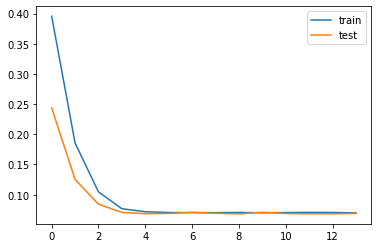

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

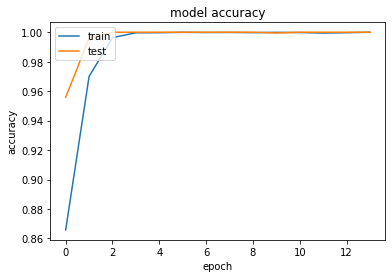

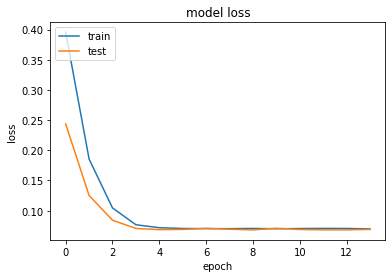

In [ ]:
 #summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_286"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1144 (Dense)           (None, 32)                224       
_________________________________________________________________
activation_1144 (Activation) (None, 32)                0         
_________________________________________________________________
dense_1145 (Dense)           (None, 16)                528       
_________________________________________________________________
activation_1145 (Activation) (None, 16)                0         
_________________________________________________________________
dense_1146 (Dense)           (None, 8)                 136       
_________________________________________________________________
activation_1146 (Activation) (None, 8)                 0         
_________________________________________________________________
dense_1147 (Dense)           (None, 1)              

In [ ]:
early_hist = pd.DataFrame(history.history)
early_hist['epoch'] = history.epoch
early_hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
9,0.070045,0.999937,0.070899,0.999497,9
10,0.070373,0.999812,0.068812,1.000000,10
11,0.070652,0.999435,0.068229,1.000000,11
12,0.070507,0.999686,0.068260,1.000000,12
13,0.069806,1.000000,0.068920,1.000000,13


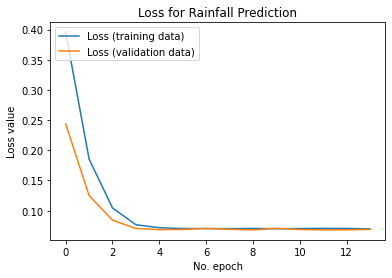

In [ ]:
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Rainfall Prediction')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


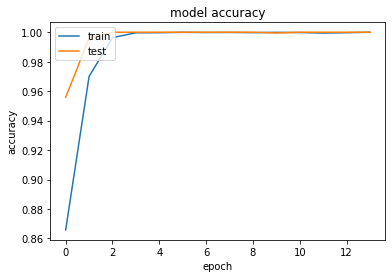

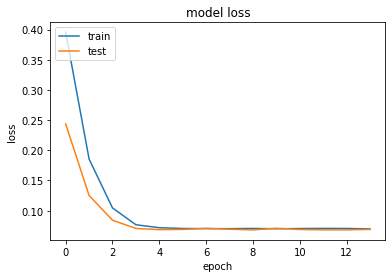

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

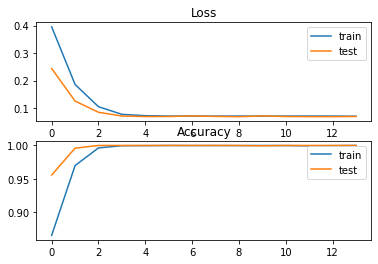

In [ ]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
model.evaluate(X_test,Y_test)

156/156 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.9998


[0.06964445114135742, 0.9997989535331726]

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
print(Y_pred)


[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 

With batch normalization and regularizer
The accuracy score of hold out test data is less compared to train and validation.Noticed its still overfitting and can be improved further with drop out and may be by including the date field that is dropped which resulted the duplicates in the data.
With only regularizer:
The accuracy score increased with reduced loss for train,test and validation and the results are run again as shown above.
Though random seed is done ,the results are bit different for each run of the Keras model with gridsearch.

Should have tried using LSTM RNN with inclusion of date field .But due to lack of knowledge on LSTM could not proceed further .